# 11.14 인공지능 심화과정-딥러닝
## 당뇨병 발병 예부 예측

In [ ]:
from google.colab import files
uploae = files.upload()

Saving diabetes_data.csv to diabetes_data (1).csv


In [ ]:
# 데이터 불러오기
import pandas as pd

data = pd.read_csv('diabetes_data.csv')
data.head()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#데이터 형태 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   gloucose        768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skin thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   DPF             768 non-null    float64
 7   age             768 non-null    int64  
 8   result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.tail()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#feature와 label 분리

X = data
X = data.iloc[0:768,0:8]
# X = data.iloc[:,:-1]   위랑 같음
print(X)

     pregnant  gloucose  blood pressure  ...   BMI    DPF  age
0           6       148              72  ...  33.6  0.627   50
1           1        85              66  ...  26.6  0.351   31
2           8       183              64  ...  23.3  0.672   32
3           1        89              66  ...  28.1  0.167   21
4           0       137              40  ...  43.1  2.288   33
..        ...       ...             ...  ...   ...    ...  ...
763        10       101              76  ...  32.9  0.171   63
764         2       122              70  ...  36.8  0.340   27
765         5       121              72  ...  26.2  0.245   30
766         1       126              60  ...  30.1  0.349   47
767         1        93              70  ...  30.4  0.315   23

[768 rows x 8 columns]


In [ ]:
y = data.iloc[:,-1]
#y = data.iloc[:,8]
# y = data.result
# y = data['result']
# y = data.;oc[:,'result']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: result, Length: 768, dtype: int64


In [ ]:
# train/ test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=9)   # 아무 숫자 넣으면 됨 >> 랜덤 고정
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
#                                                     test_size=0.5,
#                                                     random_state=9) 
print(X_train)
print(y_train)
print(X_test)
print(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

     pregnant  gloucose  blood pressure  ...   BMI    DPF  age
476         2       105              80  ...  33.7  0.711   29
448         0       104              64  ...  33.6  0.510   22
518        13        76              60  ...  32.8  0.180   41
221         2       158              90  ...  31.6  0.805   66
453         2       119               0  ...  19.6  0.832   72
..        ...       ...             ...  ...   ...    ...  ...
56          7       187              68  ...  37.7  0.254   41
501         3        84              72  ...  37.2  0.267   28
638         7        97              76  ...  40.9  0.871   32
348         3        99              62  ...  21.8  0.279   26
382         1       109              60  ...  25.4  0.947   21

[614 rows x 8 columns]
476    1
448    1
518    0
221    1
453    0
      ..
56     1
501    0
638    1
348    0
382    0
Name: result, Length: 614, dtype: int64
     pregnant  gloucose  blood pressure  ...   BMI    DPF  age
456         1     

In [ ]:
# 케라스 패키지 가져오기
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Dropout

print(keras.__version__)

2.4.0


In [ ]:
# MLP Network 구성

#비어있는 모델 만들기
model = keras.Sequential()
#input layer
#                        feature 개수    
model.add(Dense(units= 32, input_dim= 8, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))


#output layer
model.add(Dense(1, activation= 'sigmoid'))    #이진분류 : sigmoid

model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_67 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 12,833
Trainable params: 12,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model compile

model.compile(loss='binary_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
#train

history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    batch_size=16,
                    epochs=300,
                    verbose=1)   
#verbose 과정 볼거면 1 안볼거면 0 한번에 볼거면 2

Epoch 1/300
35/35 [==============================] - 0s 6ms/step - loss: 3.0347 - accuracy: 0.5435 - val_loss: 0.8138 - val_accuracy: 0.6452
Epoch 2/300
35/35 [==============================] - 0s 2ms/step - loss: 1.7257 - accuracy: 0.5924 - val_loss: 0.9653 - val_accuracy: 0.5968
Epoch 3/300
35/35 [==============================] - 0s 2ms/step - loss: 1.3369 - accuracy: 0.5670 - val_loss: 0.7985 - val_accuracy: 0.5645
Epoch 4/300
35/35 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.6069 - val_loss: 0.8986 - val_accuracy: 0.6129
Epoch 5/300
35/35 [==============================] - 0s 2ms/step - loss: 1.0007 - accuracy: 0.5815 - val_loss: 0.7441 - val_accuracy: 0.6935
Epoch 6/300
35/35 [==============================] - 0s 2ms/step - loss: 0.7376 - accuracy: 0.6540 - val_loss: 0.7637 - val_accuracy: 0.6935
Epoch 7/300
35/35 [==============================] - 0s 2ms/step - loss: 0.8013 - accuracy: 0.6449 - val_loss: 0.7906 - val_accuracy: 0.6290
Epoch 8/300
3

In [ ]:
train_acc = model.evaluate(X_train, y_train)
test_acc = model.evaluate(X_test, y_test)

print(train_acc)
print(test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 1.2676 - accuracy: 0.7013
[0.295148640871048, 0.9006514549255371]
[1.2676211595535278, 0.701298713684082]


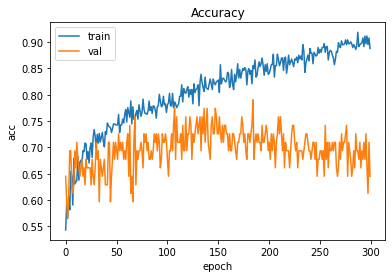

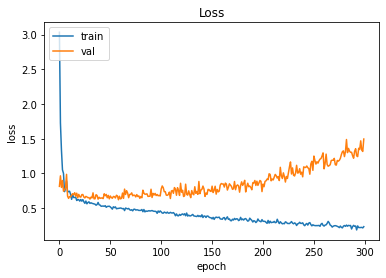

In [ ]:
# 시각화

import matplotlib.pyplot as plt

# Accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

